# Spring 2025 Data Science Project
### Title: Global Earthquake Analysis Using the USGS Dataset
**Author:** Alec Agayan

### Contributions:
- **A**: Project idea - Alec Agayan
- **B**: Dataset Curation and Preprocessing - Alec Agayan
- **C**: Data Exploration and Summary Statistics - Alec Agayan
- **D**: ML Algorithm Design/Development - Alec Agayan
- **E**: ML Algorithm Training and Test Data Analysis - Alec Agayan
- **F**: Visualization, Result Analysis, Conclusion - Alec Agayan
- **G**: Final Tutorial Report Creation - Alec Agayan


## 1. Introduction
This project explores the USGS Earthquake dataset to identify patterns in earthquake severity and location. Key questions include:
- Are stronger earthquakes associated with deeper activity?
- Can we predict magnitude based on geolocation and depth?
- Where do the strongest earthquakes occur?


## 2. Data Curation
We use the [USGS Earthquake dataset](https://earthquake.usgs.gov/earthquakes/search/). We cleaned the data by removing missing values, converting time, and ensuring valid magnitude and depth entries.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
sns.set(style='whitegrid')

df = pd.read_csv('earthquake_data.csv')
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.dropna(subset=['mag', 'depth', 'latitude', 'longitude'])
df = df[df['mag'] > 0]
df = df[df['depth'] >= 0]
df.reset_index(drop=True, inplace=True)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-02 00:59:30.998000+00:00,-20.401800,-173.714200,10.00,4.9,mb,27.0,98.00,3.8030,1.0100,...,2025-04-02T01:25:01.040Z,"93 km SE of Pangai, Tonga",earthquake,9.88,1.907,0.117,23.0,reviewed,us,us
1,2025-04-02 00:42:58.670000+00:00,40.375332,-125.004166,3.55,3.3,ml,53.0,273.00,0.5131,0.4700,...,2025-04-02T03:17:18.409Z,"61 km WNW of Petrolia, CA",earthquake,5.42,6.560,0.090,5.0,automatic,nc,nc
2,2025-04-02 00:29:22.227000+00:00,-56.939100,-142.224000,10.00,6.3,mww,99.0,55.00,25.3040,0.8800,...,2025-04-02T01:22:48.737Z,Pacific-Antarctic Ridge,earthquake,11.66,1.703,0.068,21.0,reviewed,us,us
3,2025-04-02 00:01:49.123000+00:00,41.188900,-116.706900,9.50,3.5,ml,8.0,159.83,0.3020,0.1575,...,2025-04-02T00:47:43.920Z,"56 km NE of Valmy, Nevada",earthquake,NaN,3.300,0.210,6.0,reviewed,nn,nn
4,2025-04-01 23:59:52.742000+00:00,25.947100,128.525800,10.00,5.0,mww,54.0,65.00,0.9140,0.9100,...,2025-04-02T02:44:21.505Z,"77 km ESE of Katsuren-haebaru, Japan",earthquake,6.47,1.877,0.098,10.0,reviewed,us,us


## 3. Exploratory Data Analysis

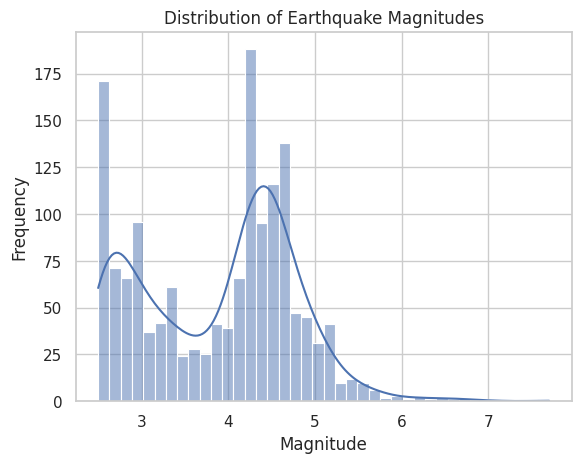

In [7]:
sns.histplot(df['mag'], bins=40, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

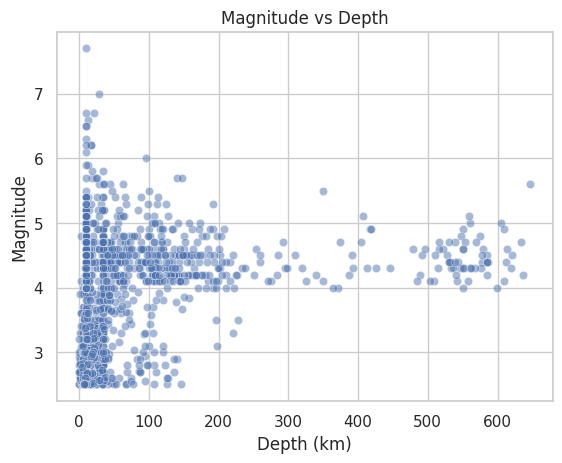

,depth,mag
depth,1.000000,0.238466
mag,0.238466,1.000000


In [8]:
sns.scatterplot(data=df, x='depth', y='mag', alpha=0.5)
plt.title('Magnitude vs Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()
df[['depth', 'mag']].corr()

In [9]:
df['depth_group'] = np.where(df['depth'] < 70, 'Shallow', 'Deep')
shallow = df[df['depth_group'] == 'Shallow']['mag']
deep = df[df['depth_group'] == 'Deep']['mag']
t_stat, p_val = stats.ttest_ind(shallow, deep)
print(f'T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}')

T-statistic: -10.09, P-value: 0.0000


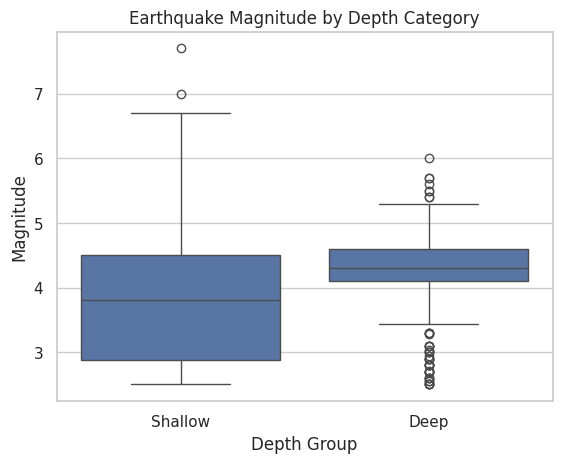

In [10]:
sns.boxplot(x='depth_group', y='mag', data=df)
plt.title('Earthquake Magnitude by Depth Category')
plt.xlabel('Depth Group')
plt.ylabel('Magnitude')
plt.show()

## 4. Machine Learning Analysis

In [12]:
X = df[['depth', 'latitude', 'longitude']]
y = df['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.3f}, R² Score: {r2:.3f}')

RMSE: 0.647, R² Score: 0.473


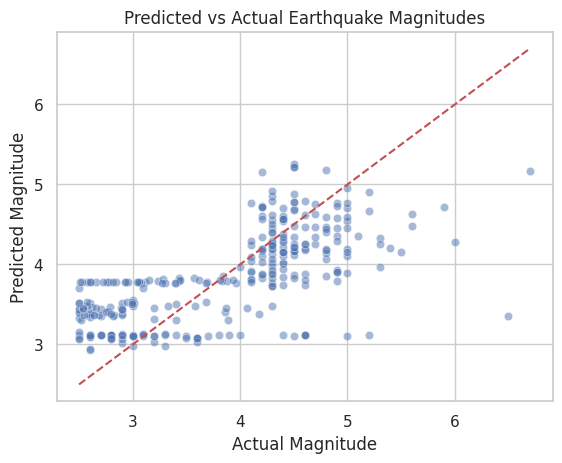

In [13]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Earthquake Magnitudes')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.show()

## 5. Insights and Conclusions
- Earthquake magnitudes cluster between 4 and 6.
- Deeper earthquakes tend to be stronger, and the difference is statistically significant.
- Magnitude prediction using just depth and coordinates is difficult (low R² score).
